In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from scipy.stats import dgamma
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
import math
import random

In [20]:
#cleveland heart disease
URL ='file:///Users/sean/Downloads/heart+disease%20(1)/processed.cleveland.data'

#Define column names
column_names = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'maxhr', 'exang', 'oldpeak', 'slope', 'majorvess', 'thal', 'disease']

#Read the dataset with specified column names
Data = pd.read_csv(URL, sep='\s+', names=column_names)
Data.head()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,majorvess,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


column 1: age (in years)
column 2: sex (1=male, 0=female)
column 3: cp: chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal, 4=asymptomatic)
column 4: restbp: resting blood pressure (in mmHg on hospital admission)
column 5: chol: serum cholesterol (in mg/dl)
column 6: fbs: fasting blood sugar > 120mg/dl (1=true, 0=false)
column 7: restecg: resting ecg results (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)
column 8: maxhr: maximum heartrate achieved
column 9: exang: exercise induced angina (1=yes, 0=no)
column 10: oldpeak: ST depression induced by exercise relative to rest
column 11: slope: slope of peak exercise ST (1=upslope, 2=flat, 3=downslope)
column 12: majorvess: number of major vessels (1-3) colored by flouroscopy
column 13: thal: thalassemia (3=normal, 6=fixed defect, 7=reversable defect)
column 14: disease: diagnosis of heart disease (0=<50% diameter narrowing, 1=>50% diameter narrowing)

In [21]:
non_numeric_columns = []

for col in Data.columns:
    try:
        pd.to_numeric(Data[col])
    except ValueError:
        non_numeric_columns.append(col)

print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: ['majorvess', 'thal']


In [22]:
Data = Data.replace('?', np.nan)
Data = Data.fillna(Data.median())

In [7]:
Data.describe()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [9]:
print(Data.duplicated().sum())

0


In [10]:
print(Data.dtypes)

age          float64
sex          float64
cp           float64
restbp       float64
chol         float64
fbs          float64
restecg      float64
maxhr        float64
exang        float64
oldpeak      float64
slope        float64
majorvess     object
thal          object
disease        int64
dtype: object


In [11]:
print(Data.isnull().sum())

age          0
sex          0
cp           0
restbp       0
chol         0
fbs          0
restecg      0
maxhr        0
exang        0
oldpeak      0
slope        0
majorvess    0
thal         0
disease      0
dtype: int64


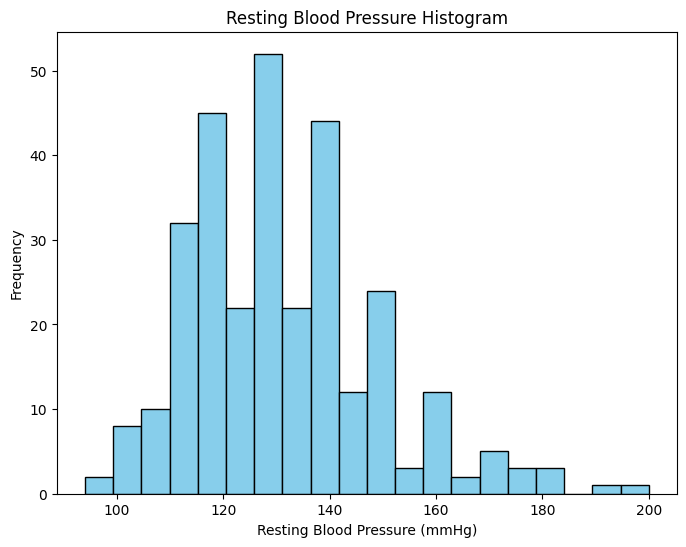

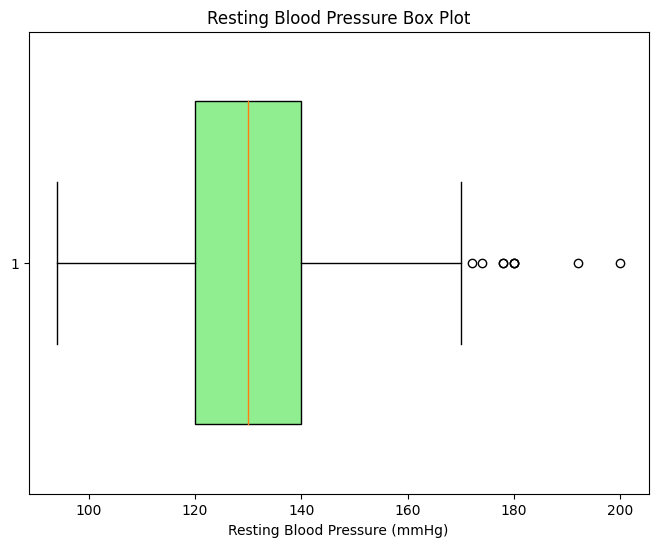

In [12]:
#visualization
#resting blood pressure
resting_bp = Data['restbp']

#histogram
plt.figure(figsize=(8, 6))
plt.hist(resting_bp, bins=20, color='skyblue', edgecolor='black')
plt.title('Resting Blood Pressure Histogram')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

#box plot
plt.figure(figsize=(8, 6))
plt.boxplot(resting_bp, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Resting Blood Pressure Box Plot')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.show()

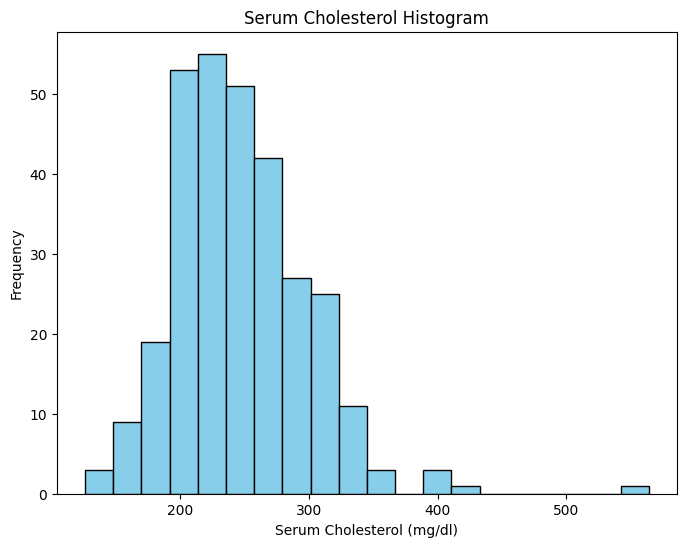

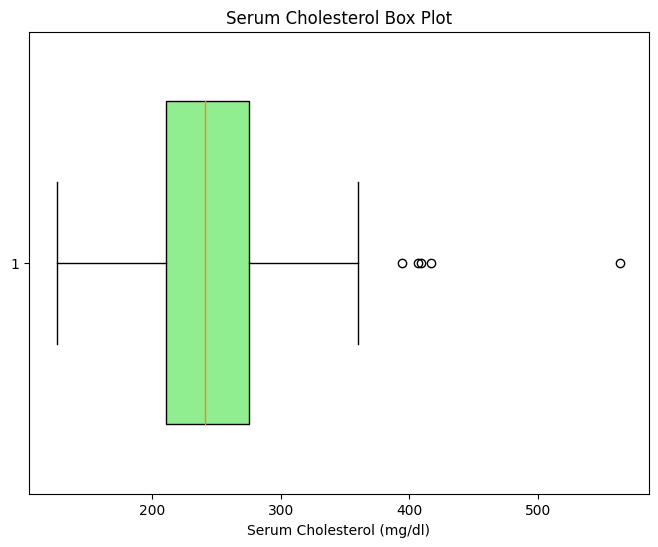

In [13]:
#visualization
#serum cholersterol
serum_chol = Data['chol']

#histogram
plt.figure(figsize=(8, 6))
plt.hist(serum_chol, bins=20, color='skyblue', edgecolor='black')
plt.title('Serum Cholesterol Histogram')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()

#box plot
plt.figure(figsize=(8, 6))
plt.boxplot(serum_chol, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Serum Cholesterol Box Plot')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.show()

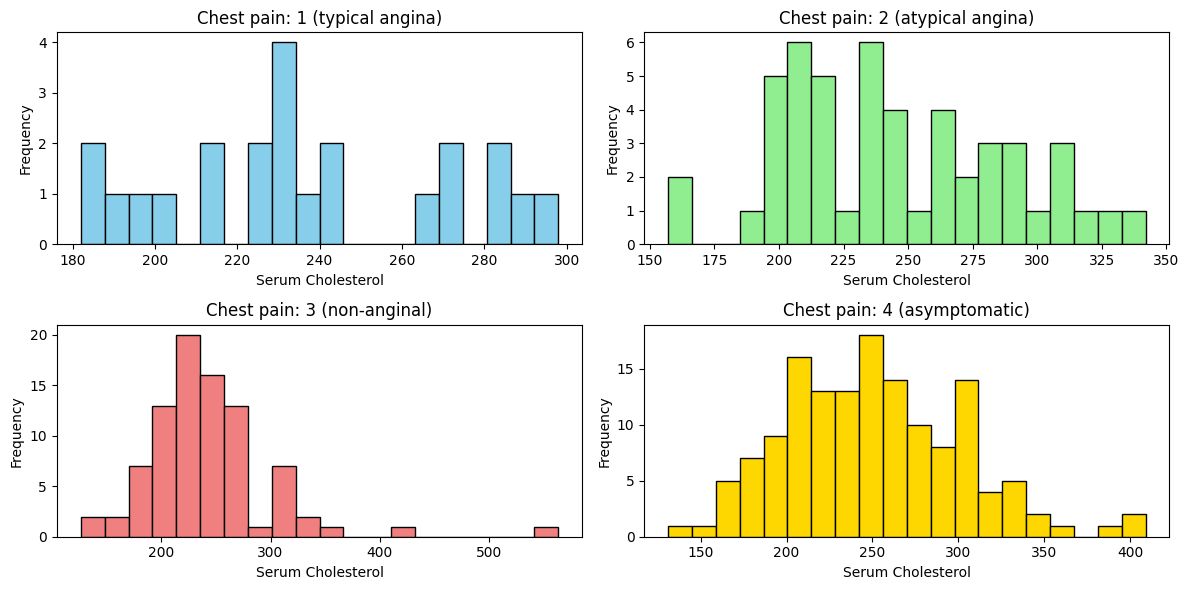

In [15]:
#serum cholesterol based on chest pain 
chest_pain = Data['cp']
serum_cholesterol = Data['chol']

#group based on chest pain 
group_1 = serum_cholesterol[chest_pain == 1]
group_2 = serum_cholesterol[chest_pain == 2]
group_3 = serum_cholesterol[chest_pain == 3]
group_4 = serum_cholesterol[chest_pain == 4]

#side by side histograms
plt.figure(figsize=(12, 6))

#CP1 type: typical angina 
plt.subplot(2, 2, 1)
plt.hist(group_1, bins=20, color='skyblue', edgecolor='black')
plt.title('Chest pain: 1 (typical angina)')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')

#CP2 type: atypical angina
plt.subplot(2, 2, 2)
plt.hist(group_2, bins=20, color='lightgreen', edgecolor='black')
plt.title('Chest pain: 2 (atypical angina)')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')

#CP3 type: non-anginal pain
plt.subplot(2, 2, 3)
plt.hist(group_3, bins=20, color='lightcoral', edgecolor='black')
plt.title('Chest pain: 3 (non-anginal)')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')

#CP4 type: asymptomatic
plt.subplot(2, 2, 4)
plt.hist(group_4, bins=20, color='gold', edgecolor='black')
plt.title('Chest pain: 4 (asymptomatic)')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [16]:
#research question prelim analysis
heart_disease_group = Data[Data['disease'] == 1]
no_heart_disease_group = Data[Data['disease'] == 0]

correlation_heart_disease = heart_disease_group['chol'].corr(heart_disease_group['restbp'])
correlation_no_heart_disease = no_heart_disease_group['chol'].corr(no_heart_disease_group['restbp'])

print('correlation for individuals with heart disease:', correlation_heart_disease)
print('correlation for individuals without heart disease:', correlation_no_heart_disease)

correlation for individuals with heart disease: 0.19637369993140544
correlation for individuals without heart disease: 0.09799485686916191


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
#process and split 
X = Data.drop('disease', axis=1)
y = Data['disease']

#split into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train['Age_Cholesterol'] = X_train['age'] * X_train['chol']
X_train['Gender_BloodPressure'] = X_train['sex'] * X_train['restbp']

X_test['Age_Cholesterol'] = X_test['age'] * X_test['chol']
X_test['Gender_BloodPressure'] = X_test['sex'] * X_test['restbp']

In [25]:
#training model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#testing model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5081967213114754


In [26]:
#variable importance
feature_importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                 Feature  Importance
7                  maxhr    0.113647
9                oldpeak    0.104320
13       Age_Cholesterol    0.090655
4                   chol    0.090001
11             majorvess    0.088132
0                    age    0.087838
14  Gender_BloodPressure    0.077135
3                 restbp    0.073553
2                     cp    0.067959
12                  thal    0.066725
10                 slope    0.042837
8                  exang    0.038251
6                restecg    0.021317
1                    sex    0.020004
5                    fbs    0.017626


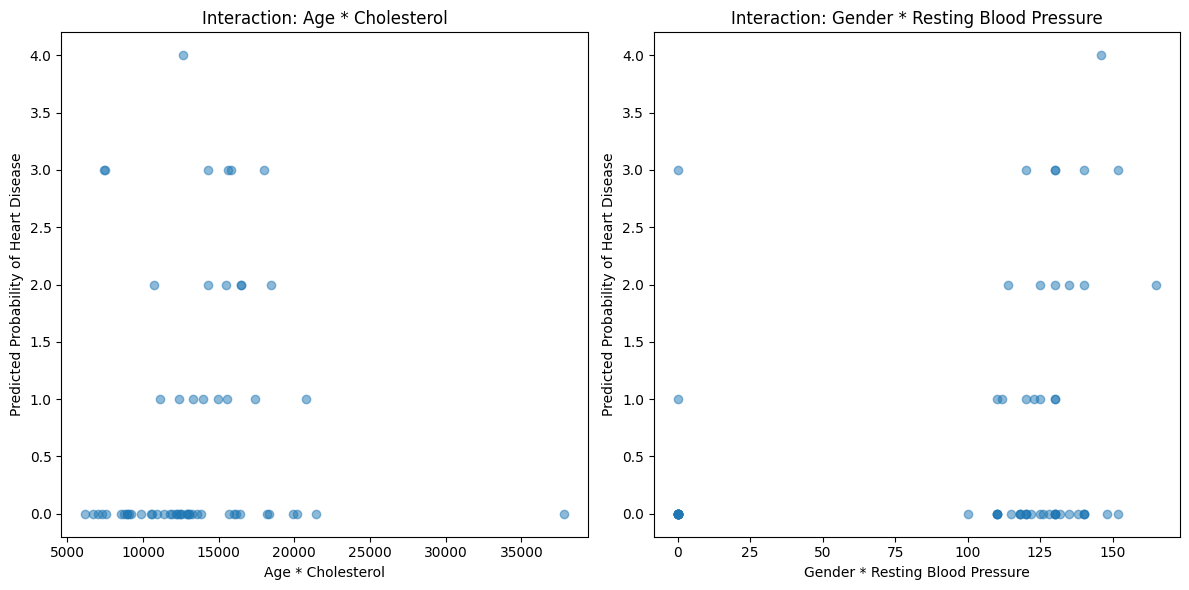

In [27]:
#plot and visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['Age_Cholesterol'], y_pred, alpha=0.5)
plt.xlabel('Age * Cholesterol')
plt.ylabel('Predicted Probability of Heart Disease')
plt.title('Interaction: Age * Cholesterol')

plt.subplot(1, 2, 2)
plt.scatter(X_test['Gender_BloodPressure'], y_pred, alpha=0.5)
plt.xlabel('Gender * Resting Blood Pressure')
plt.ylabel('Predicted Probability of Heart Disease')
plt.title('Interaction: Gender * Resting Blood Pressure')

plt.tight_layout()
plt.show()

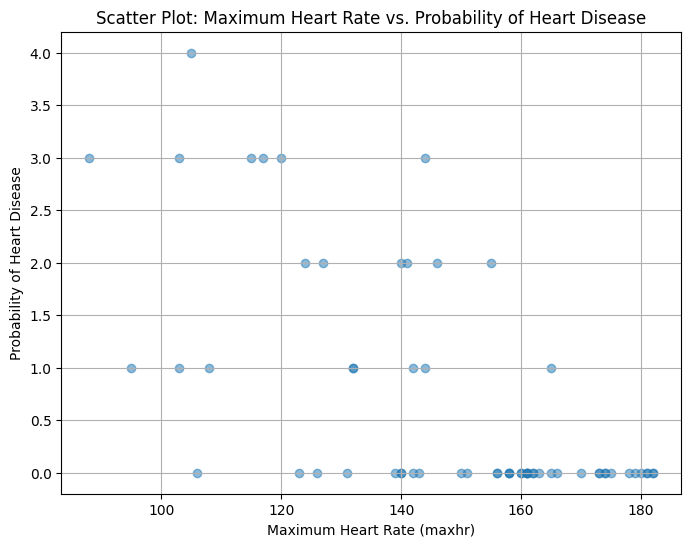

In [28]:
#maxhr vs probability of HD
plt.figure(figsize=(8, 6))
plt.scatter(X_test['maxhr'], y_pred, alpha=0.5)
plt.xlabel('Maximum Heart Rate (maxhr)')
plt.ylabel('Probability of Heart Disease')
plt.title('Scatter Plot: Maximum Heart Rate vs. Probability of Heart Disease')
plt.grid(True)
plt.show()

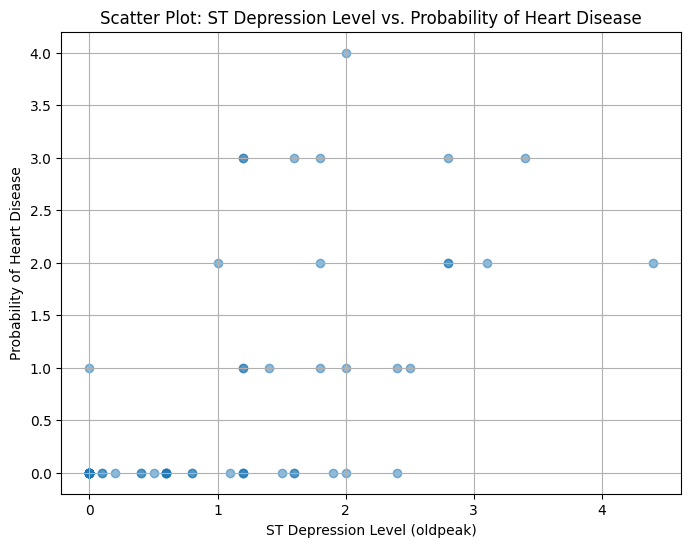

In [29]:
#oldpeak vs probability of HD
plt.figure(figsize=(8, 6))
plt.scatter(X_test['oldpeak'], y_pred, alpha=0.5)
plt.xlabel('ST Depression Level (oldpeak)')
plt.ylabel('Probability of Heart Disease')
plt.title('Scatter Plot: ST Depression Level vs. Probability of Heart Disease')
plt.grid(True)
plt.show()

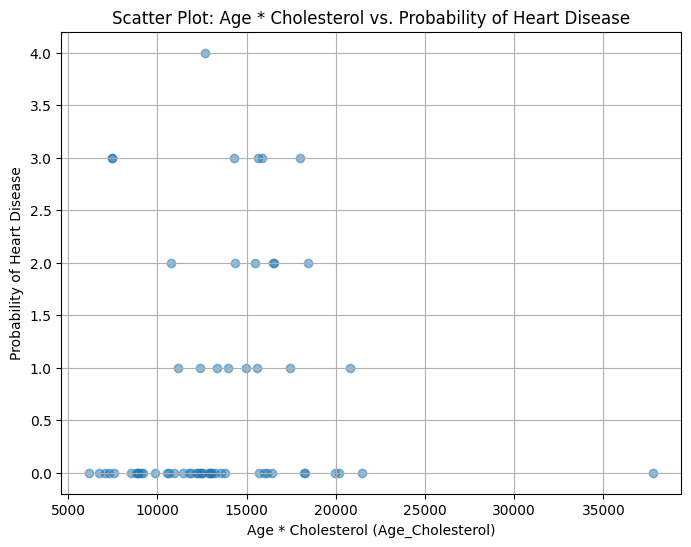

In [30]:
#age_chol vs probability of HD
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Age_Cholesterol'], y_pred, alpha=0.5)
plt.xlabel('Age * Cholesterol (Age_Cholesterol)')
plt.ylabel('Probability of Heart Disease')
plt.title('Scatter Plot: Age * Cholesterol vs. Probability of Heart Disease')
plt.grid(True)
plt.show()

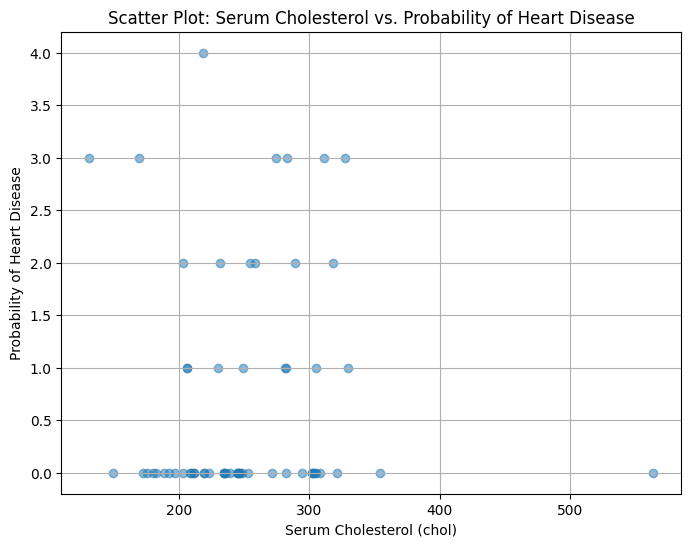

In [31]:
#chol vs probabililty of HD
plt.figure(figsize=(8, 6))
plt.scatter(X_test['chol'], y_pred, alpha=0.5)
plt.xlabel('Serum Cholesterol (chol)')
plt.ylabel('Probability of Heart Disease')
plt.title('Scatter Plot: Serum Cholesterol vs. Probability of Heart Disease')
plt.grid(True)
plt.show()

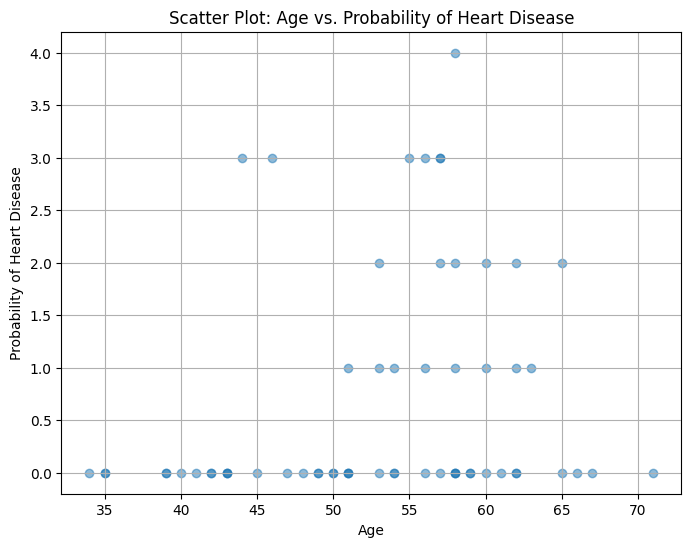

In [33]:
#age vs probability of HD
plt.figure(figsize=(8, 6))
plt.scatter(X_test['age'], y_pred, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Scatter Plot: Age vs. Probability of Heart Disease')
plt.grid(True)
plt.show()

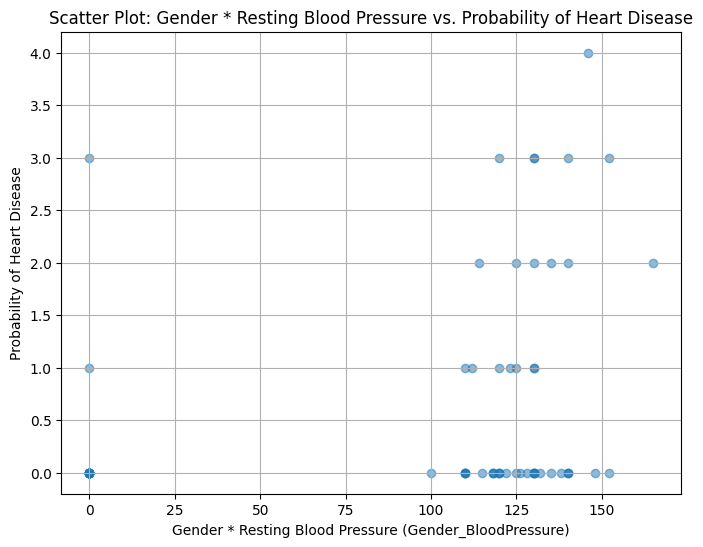

In [34]:
#sex_bp vs probability of HD
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Gender_BloodPressure'], y_pred, alpha=0.5)
plt.xlabel('Gender * Resting Blood Pressure (Gender_BloodPressure)')
plt.ylabel('Probability of Heart Disease')
plt.title('Scatter Plot: Gender * Resting Blood Pressure vs. Probability of Heart Disease')
plt.grid(True)
plt.show()

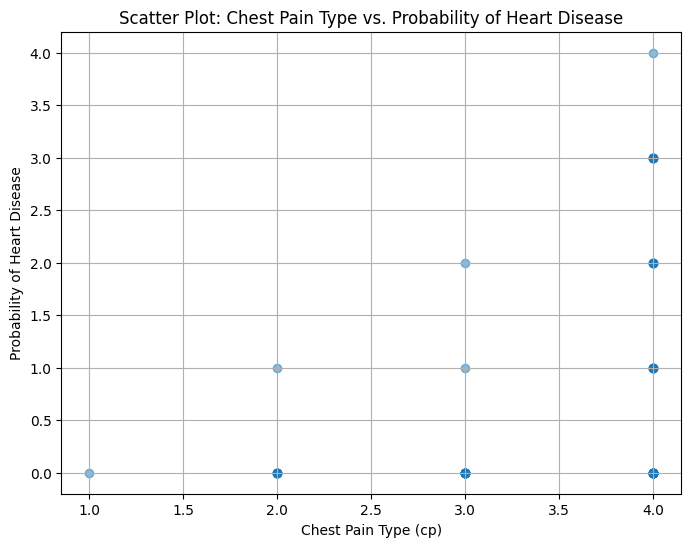

In [35]:
#cp vs probability of HD
plt.figure(figsize=(8, 6))
plt.scatter(X_test['cp'], y_pred, alpha=0.5)
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Probability of Heart Disease')
plt.title('Scatter Plot: Chest Pain Type vs. Probability of Heart Disease')
plt.grid(True)
plt.show()